In [1]:
import pandas as pd
import numpy as np

import os
for dirname, _, filenames in os.walk('../input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../input/Digit Recognizer.ipynb
../input/.ipynb_checkpoints\Digit Recognizer-checkpoint.ipynb
../input/digit-recognizer\sample_submission.csv
../input/digit-recognizer\test.csv
../input/digit-recognizer\train.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
from torch.utils.data import TensorDataset, DataLoader

from torch import nn
from torch import optim

from sklearn.model_selection import train_test_split

In [3]:
trainset = pd.read_csv('../input/digit-recognizer/train.csv')

In [4]:
print(type(trainset))
trainset.head()

<class 'pandas.core.frame.DataFrame'>


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
display(trainset['label'])
display(trainset.iloc[0])
print(type(trainset.iloc[0]))

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

label       1
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 785, dtype: int64

<class 'pandas.core.series.Series'>


In [6]:
X = trainset.loc[:,'pixel0':] / 255
Y = trainset['label']
print(type(X), type(Y))
display(X, Y)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [7]:
def viewnum(data_x, data_y, index):
    label = data_y[index];
    arr = data_x.iloc[index].values
    image = arr.reshape(28, 28)
    #print("Label: ", label)
    plt.imshow(image, cmap='gray')

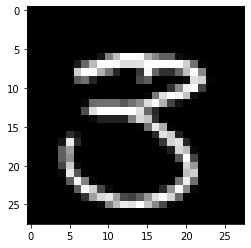

In [8]:
viewnum(X, Y, 7)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size=1/7, random_state=0)

print(type(X_train))
X_train = torch.Tensor(X_train)
print(type(X_train))
X_test = torch.Tensor(X_test)
Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)

ds_train = TensorDataset(X_train, Y_train)
ds_test = TensorDataset(X_test, Y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

<class 'numpy.ndarray'>
<class 'torch.Tensor'>


In [10]:
print(X_train, X_train.size())
print(X_test, X_test.size())
print(Y_train, Y_train.size())
print(Y_test, Y_test.size())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) torch.Size([36000, 784])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) torch.Size([6000, 784])
tensor([8, 7, 2,  ..., 9, 0, 9]) torch.Size([36000])
tensor([3, 6, 9,  ..., 0, 6, 9]) torch.Size([6000])


In [11]:
model = nn.Sequential()
model.add_module('fc1', nn.Linear(784, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [12]:
loss_fn = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.01)

In [13]:
def train(epoch):
    model.train()
    
    for data_x, data_y in loader_train:
        prediction = model(data_x)
        cost = loss_fn(prediction, data_y)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
    
    print("epoch{} : done\n".format(epoch))

In [14]:
def test():
    model.eval()
    correct = 0
    z = 1
    
    with torch.no_grad():
        for data_x, data_y in loader_test:
            prediction = model(data_x)
            
            _, predicted = torch.max(prediction.data, 1)
            correct += predicted.eq(data_y.data.view_as(predicted)).sum()
            
            if z:
                #print("data_x: ", data_x.size())
                #print("prediction:", prediction, prediction.size())
                #print("predicted: ", predicted, predicted.size())
                #print("data_y: ", data_y.data.view_as(predicted), data_y.data.view_as(predicted).size())
                z = 0
    
    data_num = len(loader_test.dataset)
    print("accuracy: {}/{} ({:.0f}%)\n".format(correct, data_num, 100 * correct / data_num))

In [15]:
def getpredict(index, xtest):
    model.eval()
    data_i = xtest[index]
    
    output = model(data_i)
    _, predicted = torch.max(output.data, 0)
    
    return predicted

In [16]:
test()

accuracy: 353/6000 (6%)



In [17]:
for epoch in range(20):
    train(epoch)
    test()
    print()

epoch0 : done

accuracy: 5678/6000 (95%)


epoch1 : done

accuracy: 5713/6000 (95%)


epoch2 : done

accuracy: 5665/6000 (94%)


epoch3 : done

accuracy: 5729/6000 (95%)


epoch4 : done

accuracy: 5743/6000 (96%)


epoch5 : done

accuracy: 5728/6000 (95%)


epoch6 : done

accuracy: 5765/6000 (96%)


epoch7 : done

accuracy: 5778/6000 (96%)


epoch8 : done

accuracy: 5772/6000 (96%)


epoch9 : done

accuracy: 5752/6000 (96%)


epoch10 : done

accuracy: 5769/6000 (96%)


epoch11 : done

accuracy: 5795/6000 (97%)


epoch12 : done

accuracy: 5788/6000 (96%)


epoch13 : done

accuracy: 5788/6000 (96%)


epoch14 : done

accuracy: 5776/6000 (96%)


epoch15 : done

accuracy: 5770/6000 (96%)


epoch16 : done

accuracy: 5793/6000 (97%)


epoch17 : done

accuracy: 5793/6000 (97%)


epoch18 : done

accuracy: 5800/6000 (97%)


epoch19 : done

accuracy: 5818/6000 (97%)





Label:
[[3 6 9 5 6 5 6 0 0 1]
 [7 1 5 7 8 1 1 5 9 6]
 [9 2 2 8 4 6 2 5 4 4]
 [8 2 8 9 3 8 4 5 2 7]
 [6 3 1 7 9 7 4 2 5 0]
 [0 3 9 8 5 1 3 1 3 5]
 [4 6 4 7 8 2 4 2 1 2]
 [0 0 6 5 7 0 9 1 9 2]
 [0 4 3 3 2 8 7 6 5 8]
 [7 9 2 8 8 4 9 1 5 1]]

[[3 6 9 5 6 5 6 0 0 1]
 [7 1 5 7 8 1 1 5 9 6]
 [9 2 2 8 4 6 2 5 4 4]
 [8 2 8 9 3 8 4 5 2 7]
 [6 3 1 7 9 7 4 2 5 0]
 [0 3 3 8 5 1 3 1 3 5]
 [4 6 4 7 8 2 4 8 1 2]
 [0 0 6 5 7 0 9 1 9 2]
 [0 4 3 3 2 8 7 6 5 8]
 [7 9 2 8 8 4 9 1 5 1]]

[[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]


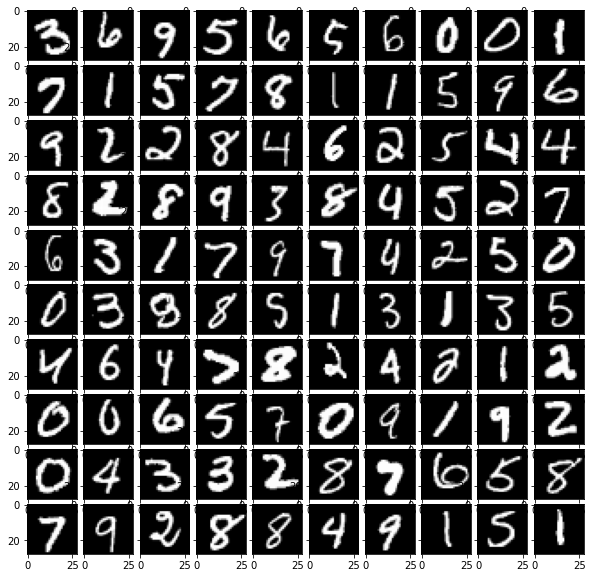

In [18]:
height = 10
width = 10
arr = []
arr2 = []

plt.figure(figsize = (10, 10))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for idx in range(0, height * width):
    X_test_pd = pd.DataFrame(X_test.numpy())
    Y_test_pd = pd.Series(Y_test.numpy())

    plt.subplot(height, width, idx + 1)
    viewnum(X_test_pd, Y_test_pd, idx)
    arr2.append((int)(Y_test_pd[idx]))
    arr.append((int)(getpredict(idx, X_test)))

print()

narr = np.array(arr).reshape(height, width)
narr2 = np.array(arr2).reshape(height, width)

print("Label:")
print(narr2)
print()
print(narr)
print()
print(np.multiply((narr2 == narr), 1))

In [19]:
height = 20
width = 10
arr = []
arr2 = []

for idx in range(0, height * width):
    arr2.append((int)(Y_test[idx]))
    arr.append((int)(getpredict(idx, X_test)))

print()

narr = np.array(arr).reshape(height, width)
narr2 = np.array(arr2).reshape(height, width)

print("Label:")
print(narr2)
print()
print(narr)
print()
print(np.multiply((narr2 == narr), 1))


Label:
[[3 6 9 5 6 5 6 0 0 1]
 [7 1 5 7 8 1 1 5 9 6]
 [9 2 2 8 4 6 2 5 4 4]
 [8 2 8 9 3 8 4 5 2 7]
 [6 3 1 7 9 7 4 2 5 0]
 [0 3 9 8 5 1 3 1 3 5]
 [4 6 4 7 8 2 4 2 1 2]
 [0 0 6 5 7 0 9 1 9 2]
 [0 4 3 3 2 8 7 6 5 8]
 [7 9 2 8 8 4 9 1 5 1]
 [6 5 7 9 1 2 9 4 0 4]
 [5 8 1 3 1 7 2 5 7 3]
 [3 7 5 0 9 3 6 6 3 3]
 [5 0 9 2 6 0 4 3 1 7]
 [4 1 1 9 8 6 3 7 0 4]
 [7 3 9 1 7 3 1 5 0 9]
 [9 1 7 2 1 1 5 1 5 6]
 [9 8 3 4 3 7 6 4 9 1]
 [6 4 4 3 7 2 9 3 1 1]
 [5 7 0 0 5 1 8 6 2 9]]

[[3 6 9 5 6 5 6 0 0 1]
 [7 1 5 7 8 1 1 5 9 6]
 [9 2 2 8 4 6 2 5 4 4]
 [8 2 8 9 3 8 4 5 2 7]
 [6 3 1 7 9 7 4 2 5 0]
 [0 3 3 8 5 1 3 1 3 5]
 [4 6 4 7 8 2 4 8 1 2]
 [0 0 6 5 7 0 9 1 9 2]
 [0 4 3 3 2 8 7 6 5 8]
 [7 9 2 8 8 4 9 1 5 1]
 [6 5 7 9 1 2 9 4 0 4]
 [5 8 1 3 1 7 2 5 7 3]
 [3 7 5 0 9 3 6 6 3 3]
 [5 0 9 2 6 0 4 3 1 7]
 [4 1 1 9 8 6 3 7 0 4]
 [7 3 9 1 7 3 1 5 0 9]
 [9 1 7 2 1 1 5 1 5 6]
 [9 8 3 4 3 7 6 4 9 1]
 [6 4 4 3 7 2 9 3 1 1]
 [5 7 0 0 5 1 8 6 2 9]]

[[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]

In [20]:
testset = pd.read_csv('../input/digit-recognizer/test.csv')

y_pred = []
xtest = testset / 255
xtest = torch.Tensor(xtest.values)

for idx in range(0, len(testset.index)):
    y_pred.append((int)(getpredict(idx, xtest)))

In [21]:
print(len(testset.index))
print(len(y_pred))

28000
28000



[[2 0 9 9 3 9 0 3 0 3]
 [5 7 4 0 4 3 3 1 9 0]
 [9 1 1 5 7 4 2 7 4 7]
 [7 5 4 2 6 2 8 5 1 6]
 [7 7 4 9 8 7 8 2 6 7]
 [6 8 8 3 8 2 1 2 2 0]
 [4 1 7 0 0 0 1 9 0 1]
 [6 5 8 8 2 8 8 9 2 3]
 [5 9 1 0 9 2 4 3 6 7]
 [2 0 6 6 1 4 3 9 7 4]
 [0 9 2 0 7 3 0 5 0 3]
 [0 0 4 7 1 7 1 1 3 3]
 [3 7 2 8 6 3 8 7 7 4]
 [3 5 6 0 0 0 3 1 3 6]
 [4 3 4 5 5 8 7 7 2 8]]



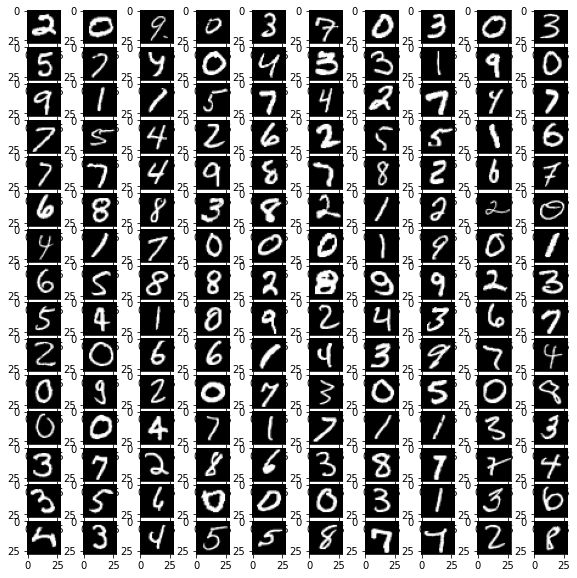

In [22]:
height = 15
width = 10
arr = []

plt.figure(figsize = (10, 10))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for idx in range(0, height * width):
    X_test_pd = pd.DataFrame(xtest.numpy())
    Y_test_pd = pd.Series(np.array(y_pred))
    
    plt.subplot(height, width, idx + 1)
    viewnum(X_test_pd, Y_test_pd, idx)
    arr.append(y_pred[idx])

print()

narr = np.array(arr).reshape(height, width)

print(narr)
print()

In [23]:
result = pd.DataFrame({'ImageId': testset.index, 'Label': y_pred})
result["ImageId"] += 1

In [24]:
result.to_csv('submission.csv', index=False)